In [8]:
from darwinian_shift import DarwinianShift
from darwinian_shift import BinomTest

from darwinian_shift import MonteCarloTest
from darwinian_shift import CDFMonteCarloTest
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import pandas as pd

In [2]:
def plot_boxplot2(self, spectra=None, plot_scale=None, show_plot=False, colours=None,
                     figsize=(5, 5), return_fig=False, ax=None):
        """
        Boxplot of the expected and observed distributions of mutation scores.
        :param spectra: The mutational spectrum or list of mutational spectra to use.
        :param plot_scale:  Scale for the y-axis (mutation scores). Passed to matplotlib. 'log', 'symlog' etc.
        :param show_plot: If True, will call plt.show().
        :param colours: List of colours. First colour is for the observed data, the subsequent colours are
        for plotting the null distributions from each of the mutational spectra given.
        :param figsize: Size of the figure.
        :param return_fig: If True, will return the figure. Used for testing.
        :param ax: Matplotlib axis to plot on. If None, will create a new figure.
        :return: By default, None. If return_fig=True, will return the figure.
        """
#        if ax is None:
#            fig, ax = plt.subplots(figsize=figsize)
#        else:
#            fig = ax.figure

        spectra = self._get_spectra(spectra)

        colours = self._get_plot_colours(colours, len(spectra)+1)
        data = [get_distribution_from_mutational_spectrum(self.null_scores,
                                                          self.null_mutations[spectrum.rate_column])
                for spectrum in spectra]
        data.append(self.observed_values)
        
        return(data)
    
    
def get_distribution_from_mutational_spectrum(values, mut_rates, num=1000000):
    mut_rates = np.array(mut_rates)
    weights = mut_rates / mut_rates.sum()
    dist = np.repeat(values, np.random.multinomial(num, weights))
    return dist

In [3]:
d_cross = DarwinianShift(
    data = pd.read_csv("../CROSS_mutations.csv"),
    source_genome = "GRCh37",
    included_mutation_types = "missense")

d_flot = DarwinianShift(
    data = pd.read_csv("../FLOT_mutations.csv"),
    source_genome = "GRCh37",
    included_mutation_types = "missense")

d_nt = DarwinianShift(
    data = pd.read_csv("../NT_mutations.csv"),
    source_genome = "GRCh37",
    included_mutation_types = "missense")

## GoF Mutation Overlap

In [6]:
## Taken from Grabiner et al, Xu et al, Kim et al
## Grabiner: https://doi.org:10.1158/2159-8290.Cd-13-0929
## Xu: https://doi.org:10.1172/JCI86120
## Kim: https://doi.org:10.1038/s41467-020-16115-w
MTOR_GOF_mutations = [  
"A1459P","A1519T","A2210P","A2226S","C1483F","C1483R","C1483W","C1483Y","D2512H","E1799K","F1888I","F1888L","F1888V",
"I1973F","I2500F","I2500M","L1433S","L1460P","L2209V","L2216P","L2220F","L2230V","L2431P","M2327I","N2206S",
"P2229R","Q2223K","R2217W","R2505P","S2215F","S2215P","S2215Y","T1977K","T1977R","V2006I","V2006L"] 

In [12]:
MTOR_gene = {
    'gene': 'MTOR',
    'pdb_id': '6BCX', 
    'pdb_chain': 'A'
}

from darwinian_shift import VariantMatchLookup

vm_lookup = VariantMatchLookup(match_column='aachange', target_key="match_list")

### CROSS

In [11]:
v_cross = d_cross.run_section({
        'gene': 'MTOR',
        'lookup': vm_lookup,
        'match_list': MTOR_GOF_mutations}
        ,statistics=BinomTest()
        )

v_cross.get_results_dictionary()

{'gene': 'MTOR',
 'transcript_id': 'ENST00000361445',
 'chrom': '1',
 'section_id': 'ENST00000361445',
 'num_mutations': 46,
 'observed_median': 0.0,
 'observed_mean': 0.08695652173913043,
 'expected_median_glob_k3': 0.0,
 'median_shift_glob_k3': 0.0,
 'expected_mean_glob_k3': 0.00317360054403144,
 'mean_shift_glob_k3': 0.08378292119509899,
 'binom_glob_k3_pvalue': 1.4880651935186692e-05,
 'binom_glob_k3_expected_proportion': 0.0031736005440314396,
 'binom_glob_k3_observed_proportion': 0.08695652173913043,
 'binom_glob_k3_expected_count': 0.14598562502544624,
 'binom_glob_k3_observed_count': 4,
 'binom_glob_k3_threshold': 0.5,
 'binom_glob_k3_expected_CI_high': 1.0,
 'binom_glob_k3_expected_CI_low': 0.0,
 'binom_glob_k3_observed_CI_low': 1.0,
 'binom_glob_k3_observed_CI_high': 8.0}

### FLOT

In [13]:
v_flot = d_flot.run_section({
        'gene': 'MTOR',
        'lookup': vm_lookup,
        'match_list': MTOR_GOF_mutations}
        ,statistics=BinomTest()
        )

v_flot.get_results_dictionary()

{'gene': 'MTOR',
 'transcript_id': 'ENST00000361445',
 'chrom': '1',
 'section_id': 'ENST00000361445',
 'num_mutations': 50,
 'observed_median': 0.0,
 'observed_mean': 0.24,
 'expected_median_glob_k3': 0.0,
 'median_shift_glob_k3': 0.0,
 'expected_mean_glob_k3': 0.003189597528882756,
 'mean_shift_glob_k3': 0.23681040247111723,
 'binom_glob_k3_pvalue': 1.203380310073869e-19,
 'binom_glob_k3_expected_proportion': 0.003189597528882756,
 'binom_glob_k3_observed_proportion': 0.24,
 'binom_glob_k3_expected_count': 0.1594798764441378,
 'binom_glob_k3_observed_count': 12,
 'binom_glob_k3_threshold': 0.5,
 'binom_glob_k3_expected_CI_high': 1.0,
 'binom_glob_k3_expected_CI_low': 0.0,
 'binom_glob_k3_observed_CI_low': 6.0,
 'binom_glob_k3_observed_CI_high': 18.0}

### NT

In [16]:
v_nt = d_cross.run_section({
        'gene': 'MTOR',
        'lookup': vm_lookup,
        'match_list': MTOR_GOF_mutations}
        ,statistics=BinomTest()
        )

v_nt.get_results_dictionary()

{'gene': 'MTOR',
 'transcript_id': 'ENST00000361445',
 'chrom': '1',
 'section_id': 'ENST00000361445',
 'num_mutations': 46,
 'observed_median': 0.0,
 'observed_mean': 0.08695652173913043,
 'expected_median_glob_k3': 0.0,
 'median_shift_glob_k3': 0.0,
 'expected_mean_glob_k3': 0.00317360054403144,
 'mean_shift_glob_k3': 0.08378292119509899,
 'binom_glob_k3_pvalue': 1.4880651935186692e-05,
 'binom_glob_k3_expected_proportion': 0.0031736005440314396,
 'binom_glob_k3_observed_proportion': 0.08695652173913043,
 'binom_glob_k3_expected_count': 0.14598562502544624,
 'binom_glob_k3_observed_count': 4,
 'binom_glob_k3_threshold': 0.5,
 'binom_glob_k3_expected_CI_high': 1.0,
 'binom_glob_k3_expected_CI_low': 0.0,
 'binom_glob_k3_observed_CI_low': 1.0,
 'binom_glob_k3_observed_CI_high': 8.0}

### Plotting

/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_97716/2019697845.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels([0,5,10,15,20,25], size = 16)


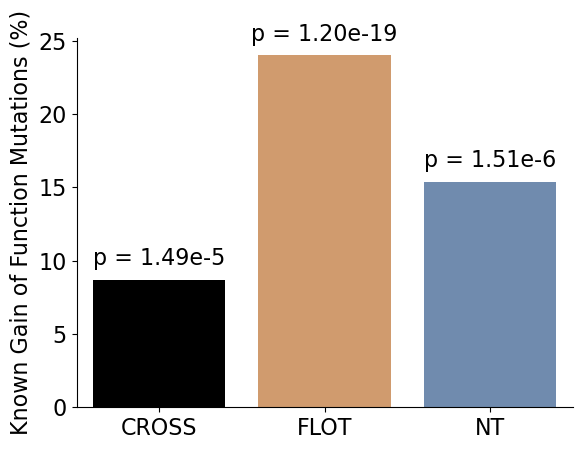

In [17]:
fig, ax = plt.subplots()
sample = [0,1,2]

ratio = [4/46, 12/50, 4/26]


g = sns.barplot(x = sample, y = ratio, palette= ["k", "#E0995E", "#668AB8"], ax = ax)
g.set_xticklabels(["CROSS", "FLOT", "NT"], size = 16)
g.set_yticklabels([0,5,10,15,20,25], size = 16)
g.set_ylabel("Known Gain of Function Mutations (%)", size = 16)

#ax.tick_params(direction='out', length=6, width=2, colors='#8F9191',
#               labelcolor = "k")

#for _,s in ax.spines.items():
#    s.set_linewidth(2)
#    s.set_color('#8F9191')    
    
sns.despine()

ax.annotate("p = 1.49e-5", (0, 4/46+0.01), ha = "center", size = 16)
ax.annotate("p = 1.20e-19", (1, 12/50+0.01), ha = "center", size = 16)
ax.annotate("p = 1.51e-6", (2, 4/26+0.01), ha = "center", size = 16)

plt.savefig("MTOR_GoF_barplot.pdf")

## Foldx Energies

In [24]:
from darwinian_shift import FoldXLookup

MTOR = {
    "gene": "MTOR",
    "pdb_id": "6BCX",
    "pdb_chain": "A",
}

fold = FoldXLookup(foldx_results_directory = "../Foldx/",
                  sifts_directory = ".",
                  download_sifts=True)

In [25]:
s_foldx_cross = d_cross.run_section(MTOR, lookup=fold, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])
s_foldx_flot = d_flot.run_section(MTOR, lookup=fold, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])
s_foldx_nt = d_nt.run_section(MTOR, lookup=fold, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [26]:
s_foldx_cross.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.48055194480551944,
 'MC_Median_glob_k3_pvalue': 0.9607039296070393,
 'CDF_MC_glob_k3_pvalue': 0.9825017498250175}

In [28]:
s_foldx_flot.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.0021997800219978004,
 'MC_Median_glob_k3_pvalue': 0.003999600039996,
 'CDF_MC_glob_k3_pvalue': 0.017198280171982803}

In [27]:
s_foldx_nt.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.6125387461253875,
 'MC_Median_glob_k3_pvalue': 0.041995800419958006,
 'CDF_MC_glob_k3_pvalue': 0.35896410358964104}

In [31]:
data_cross = plot_boxplot2(s_foldx_cross)
data_flot = plot_boxplot2(s_foldx_flot)
data_nt= plot_boxplot2(s_foldx_nt)

basedistcross = data_cross[0]
crossdist = data_cross[1]
basedistflot = data_flot[0]
flotdist = data_flot[1]
basedistnt = data_flot[0]
ntdist = data_nt[1]

basedistcross = pd.DataFrame(basedistcross)
basedistcross["label"] = "base_cross"
basedistcross.columns = ["score", "label"]

basedistflot = pd.DataFrame(basedistflot)
basedistflot["label"] = "base_flot"
basedistflot.columns = ["score", "label"]

basedistnt = pd.DataFrame(basedistnt)
basedistnt["label"] = "base_nt"
basedistnt.columns = ["score", "label"]

crossdist = pd.DataFrame(crossdist)
crossdist["label"] = "cross"

flotdist = pd.DataFrame(flotdist)
flotdist["label"] = "flot"

ntdist = pd.DataFrame(ntdist)
ntdist["label"] = "nt"

testdist_cross = pd.DataFrame([-15])
testdist_cross["label"] = "base_cross"
testdist_cross.columns = ["score", "label"]

testdist_flot = pd.DataFrame([-15])
testdist_flot["label"] = "base_flot"
testdist_flot.columns = ["score", "label"]

testdist_nt = pd.DataFrame([-15])
testdist_nt["label"] = "base_nt"
testdist_nt.columns = ["score", "label"]

combined = pd.concat([basedistcross, crossdist, basedistflot, flotdist,basedistnt, ntdist], axis =0)
combined2 = pd.concat([testdist_cross, crossdist,testdist_flot, flotdist,testdist_nt, ntdist], axis =0)

/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_97716/3633330576.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size = 14)
/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_97716/3633330576.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels([0,-4,-2,0,2,4,6,8,10], size = 14)


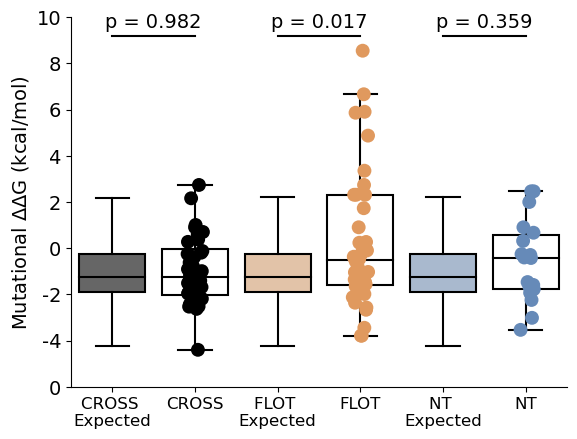

In [36]:
 fig, ax = plt.subplots()

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}


g = sns.boxplot(data = combined, x = "label", y = "score"
                , palette = ["k", "w", "#E0995E", "w", "#668AB8", "w"], showfliers = False)
for patch in ax.patches:
    r, g1, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g1, b, 0.6))

g2 = sns.stripplot(data = combined2, x = "label", y = "score", palette=["w", "k","w", "#E0995E","w", "#668AB8"], size = 10)

x1, x2 = 0, 1  
y, h, col = 14, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.2, "p = 0.982", ha='center', va='bottom', color=col, size = 14)


x1, x2 = 2, 3  
y, h, col = 14, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.2, "p = 0.017", ha='center', va='bottom', color=col, size = 14)

x1, x2 = 4, 5  
y, h, col = 14, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.2, "p = 0.359", ha='center', va='bottom', color=col, size = 14)

g.set_xlabel("")
g.set_xticklabels(["CROSS \nExpected", "CROSS", "FLOT \nExpected", "FLOT", "NT \nExpected", "NT"], size = 12)

g.set_ylabel(r"Mutational $\Delta$$\Delta$G (kcal/mol)", size = 14)
g.set_yticklabels(g.get_yticklabels(), size = 14)

#g.set_yscale("symlog")

ax.set_ylim(-5, 15)
sns.despine()


g.set_yticklabels([0,-4,-2,0,2,4,6,8,10], size = 14)

plt.savefig("MTOR_foldxDDG.pdf")
plt.show()

## Distance to Kinase domain

In [47]:
from darwinian_shift import StructureDistanceLookup

kinase_domain = "chainID A and resid 2181:2441"

kinasedist = StructureDistanceLookup(target_key = "target_selection", distance_to_alpha_carbons=True,
                                 sifts_directory = ".", pdb_directory=".")

MTOR_dist = {
    "gene": "MTOR",
    "pdb_id": "6BCX",
    "pdb_chain": "A",
    "target_selection":kinase_domain}

In [48]:
mtor_kinase_cross = d_cross.run_section(MTOR_dist, lookup=kinasedist, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

mtor_kinase_flot = d_flot.run_section(MTOR_dist, lookup=kinasedist, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

mtor_kinase_nt = d_nt.run_section(MTOR_dist, lookup=kinasedist, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

/Users/davidshorthouse/anaconda3/envs/dsenv/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/Users/davidshorthouse/anaconda3/envs/dsenv/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/Users/davidshorthouse/anaconda3/envs/dsenv/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [49]:
mtor_kinase_cross.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.009599040095990401,
 'MC_Median_glob_k3_pvalue': 0.0057994200579942,
 'CDF_MC_glob_k3_pvalue': 0.005599440055994401}

In [50]:
mtor_kinase_flot.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.00019998000199980003,
 'MC_Median_glob_k3_pvalue': 0.00019998000199980003,
 'CDF_MC_glob_k3_pvalue': 0.00019998000199980003}

In [51]:
mtor_kinase_nt.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.0047995200479952005,
 'MC_Median_glob_k3_pvalue': 0.018998100189981004,
 'CDF_MC_glob_k3_pvalue': 0.008599140085991401}

### Plotting

In [52]:
data_cross = plot_boxplot2(mtor_kinase_cross)
data_flot = plot_boxplot2(mtor_kinase_flot)
data_nt= plot_boxplot2(mtor_kinase_nt)

basedistcross = data_cross[0]
crossdist = data_cross[1]
basedistflot = data_flot[0]
flotdist = data_flot[1]
basedistnt = data_flot[0]
ntdist = data_nt[1]

basedistcross = pd.DataFrame(basedistcross)
basedistcross["label"] = "base_cross"
basedistcross.columns = ["score", "label"]

basedistflot = pd.DataFrame(basedistflot)
basedistflot["label"] = "base_flot"
basedistflot.columns = ["score", "label"]

basedistnt = pd.DataFrame(basedistnt)
basedistnt["label"] = "base_nt"
basedistnt.columns = ["score", "label"]

crossdist = pd.DataFrame(crossdist)
crossdist["label"] = "cross"

flotdist = pd.DataFrame(flotdist)
flotdist["label"] = "flot"

ntdist = pd.DataFrame(ntdist)
ntdist["label"] = "nt"

testdist_cross = pd.DataFrame([-15])
testdist_cross["label"] = "base_cross"
testdist_cross.columns = ["score", "label"]

testdist_flot = pd.DataFrame([-15])
testdist_flot["label"] = "base_flot"
testdist_flot.columns = ["score", "label"]

testdist_nt = pd.DataFrame([-15])
testdist_nt["label"] = "base_nt"
testdist_nt.columns = ["score", "label"]

combined = pd.concat([basedistcross, crossdist, basedistflot, flotdist,basedistnt, ntdist], axis =0)
combined2 = pd.concat([testdist_cross, crossdist,testdist_flot, flotdist,testdist_nt, ntdist], axis =0)

/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_97716/3975380323.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size = 14)
/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_97716/3975380323.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels([0,20,40,60,80,100], size = 14)


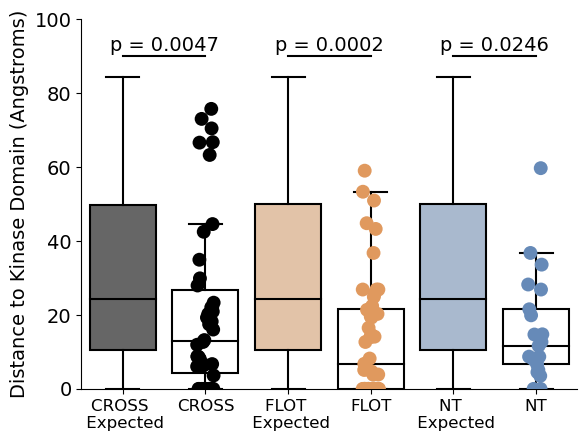

In [54]:
fig, ax = plt.subplots()

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}


g = sns.boxplot(data = combined, x = "label", y = "score"
                , palette = ["k", "w", "#E0995E", "w", "#668AB8", "w"], showfliers = False)
for patch in ax.patches:
    r, g1, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g1, b, 0.6))

g2 = sns.stripplot(data = combined2, x = "label", y = "score", palette=["w", "k","w", "#E0995E","w", "#668AB8"], size = 10)

x1, x2 = 0, 1  
y, h, col = 90, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.4, "p = 0.0047", ha='center', va='bottom', color=col, size = 14)


x1, x2 = 2, 3  
y, h, col = 90, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.4, "p = 0.0002", ha='center', va='bottom', color=col, size = 14)

x1, x2 = 4, 5  
y, h, col = 90, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.4, "p = 0.0246", ha='center', va='bottom', color=col, size = 14)

g.set_xlabel("")
g.set_xticklabels(["CROSS \n Expected", "CROSS", "FLOT \n Expected", "FLOT", "NT \n Expected", "NT"], size = 12)

g.set_ylabel("Distance to Kinase Domain (Angstroms)", size = 14)
g.set_yticklabels(g.get_yticklabels(), size = 14)
ax.set_ylim(0, 100)
sns.despine()

g.set_yticklabels([0,20,40,60,80,100], size = 14)

plt.savefig("MTOR_distancetokinase.pdf")
plt.show()